In [1]:
import os 
import re
import nltk
import math
import numpy as np
import pandas as pd
import seaborn as sns
import arabic_reshaper
import matplotlib.pyplot as plt
from collections import Counter
from bidi.algorithm import get_display
from nltk.tokenize import word_tokenize
import arabicstopwords.arabicstopwords as stp

In [2]:
path = 'Hespress'
lst = []
for file in os.listdir(path):
    df = pd.read_csv(path+'\\'+file, header=0, encoding='utf8',  index_col=[0])
    lst.append(df)

stories = pd.concat(lst, axis=0, ignore_index=True)
stories

,id,title,date,author,story,topic
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...
10995,75b0b940055811ebb2ff646e69d991ea,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
10996,775c3440055811ebbc60646e69d991ea,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
10997,78fea9ba055811eb9e32646e69d991ea,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
10998,7a58d38c055811ebb9c9646e69d991ea,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight


In [3]:
stories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 515.8+ KB


In [4]:
# this means there is no missing values
print(stories.isnull().sum(), stories.isna().sum(), sep='\n\n')

id        0
title     0
date      0
author    0
story     0
topic     0
dtype: int64

id        0
title     0
date      0
author    0
story     0
topic     0
dtype: int64


In [5]:
arabic_stopwords = stp.stopwords_list()

In [6]:
# remove_stopwords_and_punctuation 
def remove(text,stopwords):
    punctuation = '\؛!"#\$%&\'()*+,،-.؟/:;<=>?@[\\]^_`{|}~'
    text = re.sub('[' + re.escape(punctuation) + ']', '', text)
    text_tokens = word_tokenize(text)
    return " ".join([word for word in text_tokens if not word in stopwords])

In [7]:
# Add a new column for the stories without stopwords and punctuations
stories['story_clean'] = stories['story'].apply(lambda x: remove(x, arabic_stopwords))

In [13]:
print('Before Cleaning:')
print(stories['story'][1])
print('-----------------------------------------------------------------------------------')
print('After Cleaning:')
print(stories['story_clean'][1])

Before Cleaning:
في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بجائحة "كورونا"، أعلن مهرجان الرباط الدولي لسينما المؤلّف عن تنظيم دورته الخامسة والعشرين عن بعد، في الفترة الممتدّة من 23 إلى 31 أكتوبر 2020.وتُكرِّم هذه الدورة "سيدة المسرح وأول وزيرة فنانة في تاريخ المغرب المعاصر، المرحومة الفنانة ثريا جبران التي غادرتنا إلى دار البقاء في شهر غشت الماضي، والتي تركت وراءها تجربة فنية في مجال التشخيص تجاوزت حدود المسرح إلى تخوم السينما والتلفزيون".وقال المهرجان في بيان له إنّه "يُجدد اللقاء بمحبي الفن السابع في دورته الخامسة والعشرين، التي تصادف هذه السنة اليوبيل الفضي للمهرجان"، بعد "مسار فني حافل بَصَمت فيه جمعية مهرجان الرباط الدولي للثقافة والفنون على موعدٍ قارٍ، تنفتحُ فيه عاصمة المملكة على محيطها العربي والإفريقي والدولي، لتقاسم التجارب الإبداعية، والتعريف بقيم التسامح والانفتاح والتعايش التي لطالما ميزت الشعب المغربي".وذكر المهرجان أنّه "في ظل الظروف الصحية الحالية، وعملا بمتطلبات حالة الطوارئ والإجراءات الاحترازية التي أعلنت عنها بلادنا من أجل محاصرة جائحة كورونا"، تقرّر الإبقاء على 

In [9]:
stories.head()

,id,title,date,author,story,topic,story_clean
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,وجه بيت الشعر المغرب وزير الثقافة والشباب والر...
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,ظلّ استمرار حالة الطوارئ الصحية المرتبطة بجائح...
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,تشير مشاهدة فيلم قصير الثلاثية الأخيرة للمخرج ...
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,مِن قَلب أيّام الحَجْر رأتِ النّورَ الفصول الأ...
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,أعلن الفنان المغربيّ سعيد مسكر تخليه مبلغ الدّ...


### csv file contain all topics and cleaned stroies
#### stories.to_csv('all_stories.csv')

In [11]:
topics = stories.topic.unique()
len(topics)

11

In [12]:
authors = stories.author.unique()
len(authors)

874

# Exploratory Data Analysis (EDA)

### Number of exampples 'stories' per topic 'class'

In [25]:
topics_value = stories.topic.value_counts()
topics_value

art-et-culture        1000
economie              1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
regions               1000
societe               1000
sport                 1000
tamazight             1000
Name: topic, dtype: int64

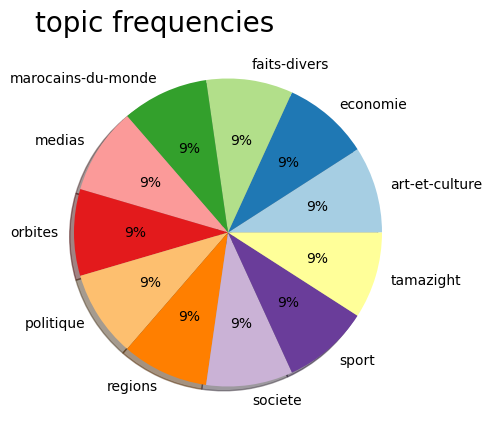

In [37]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(5, 5))
plt.title("topic frequencies", fontsize = 20, loc='left')
plt.pie(topics_value.values, labels = topics_value.index, colors = colors, autopct='%.0f%%', shadow = True)
plt.show()

### top frequent n-grams generally

In [15]:
words = nltk.FreqDist()
for story in stories['story_clean']:
    text_tokens = word_tokenize(story)
    freq = nltk.FreqDist(text_tokens)
    words.update(freq)
    #fd_combined = fd1.copy()  
    #words.append(freq)
words

FreqDist({'المغرب': 8542, 'المغربية': 7944, 'الأمازيغية': 5195, 'حالة': 5146, 'محمد': 5116, 'المغربي': 5076, 'كورونا': 4898, 'عدد': 4786, 'سنة': 4713, 'تم': 4565, ...})

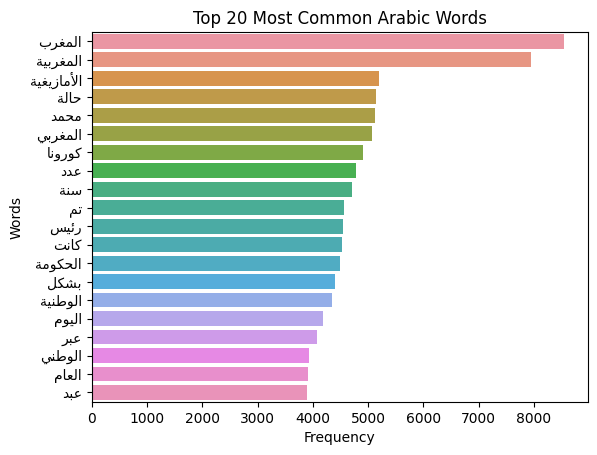

In [77]:
top_words = words.most_common(20)

words_list = [get_display(arabic_reshaper.reshape(word[0])) for word in top_words]
freq_list = [word[1] for word in top_words]

fig, ax = plt.subplots()
sns.barplot(x=freq_list, y=words_list, ax=ax)

ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Top 20 Most Common Arabic Words')

plt.show()

### top frequent n-grams 'one word'  per class.
#### can change number of words by n, number of top frequent by top_num

In [59]:
def top_ngrams(column, n=1, top_num=5):
    
    # create a list of words for each example
    story_cleaned = column.str.lower().replace('[^\w\s]', '', regex=True).apply(lambda x: x.split())
    
    # Create the ngrams pandas series
    ngrams = story_cleaned.apply(lambda x: list(zip(*[x[i:] for i in range(n)])))
    ngram_counts = ngrams.explode().value_counts()

    top_ngrams = ngram_counts.head(top_num)  
    
    return top_ngrams

In [79]:
for topic in topics:
    print(f'Top 5 frequent unigrams for {topic}')
    print(top_ngrams(stories[stories['topic']==topic]['story_clean']), end='\n\n')

Top 5 frequent unigrams for art-et-culture
(المغربي,)     1147
(المغربية,)     952
(أن,)           920
(محمد,)         825
(المغرب,)       810
Name: story_clean, dtype: int64

Top 5 frequent unigrams for economie
(المائة,)    1852
(المغرب,)    1343
(درهم,)      1178
(كورونا,)     968
(سنة,)        735
Name: story_clean, dtype: int64

Top 5 frequent unigrams for faits-divers
(العامة,)      1035
(عناصر,)        770
(النيابة,)      734
(المشتبه,)      646
(القضائية,)     632
Name: story_clean, dtype: int64

Top 5 frequent unigrams for marocains-du-monde
(المغربية,)    2508
(المغاربة,)    1834
(المغرب,)      1575
(الجالية,)      937
(المغربي,)      917
Name: story_clean, dtype: int64

Top 5 frequent unigrams for medias
(المغربية,)    1716
(المغرب,)      1608
(المساء,)      1265
(اليوم,)       1207
(الجريدة,)     1139
Name: story_clean, dtype: int64

Top 5 frequent unigrams for orbites
(الله,)        1980
(المغرب,)      1877
(كورونا,)      1165
(المغربية,)    1125
(العالم,)      1065
Name: 

### top n author for each topic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

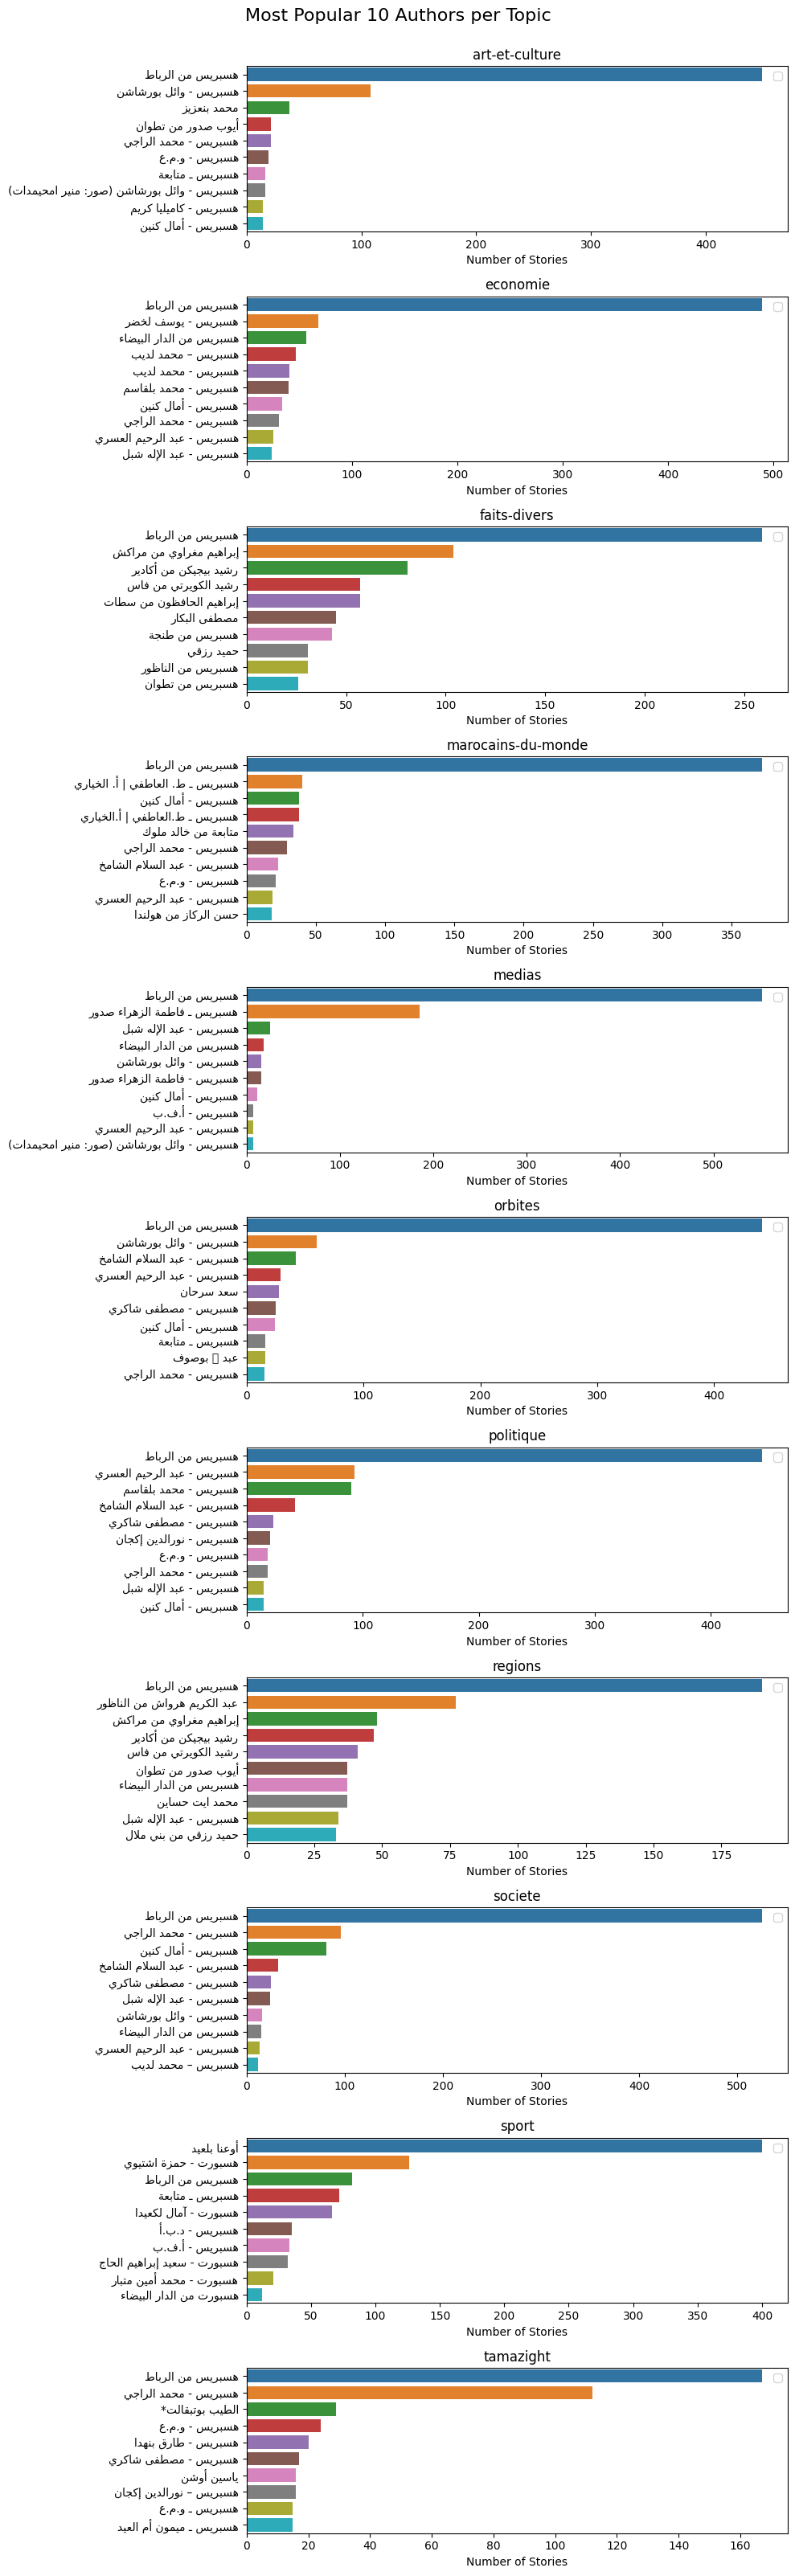

In [86]:
num_rows = (11+ 2) // 3 
fig, axes = plt.subplots(11, 1, figsize=(10, 8 * num_rows))
axes = axes.flatten()

for i, topic in enumerate(topics):
    ax = axes[i]
    top_author = stories[stories.topic==topic].author.apply(arabic_reshaper.reshape).apply(get_display).value_counts().index[:10]
    top_author_cnt = stories[stories.topic==topic].author.apply(arabic_reshaper.reshape).apply(get_display).value_counts().values[:10]
    
    sns.barplot(x=top_author_cnt, y=top_author, ax=ax)
    
    ax.set_title(topic)
    ax.set_xlabel('Number of Stories')
    ax.legend()
    
fig.suptitle('Most Popular 10 Authors per Topic', y=1, fontsize=16)
plt.tight_layout()

plt.show()